In [4]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [25]:
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as mf

In [5]:
# z0 (k01) ensemble average
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [27]:
# Load the area data
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_z0avg['xt_ocean'],'yt_ocean':ds_z0avg['yt_ocean']})

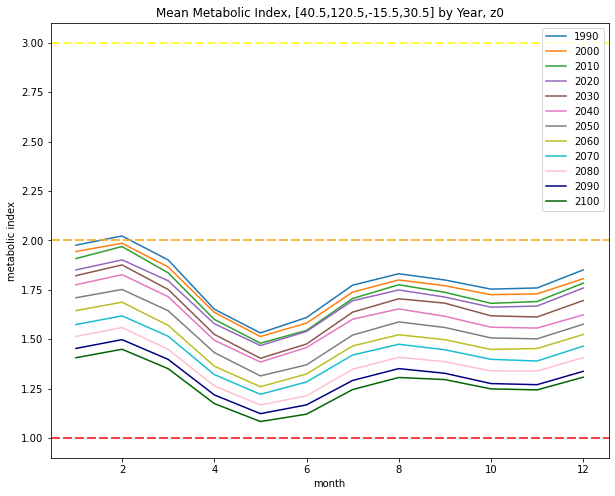

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [40.5,120.5,-15.5,30.5], True, True, True, 'z0')

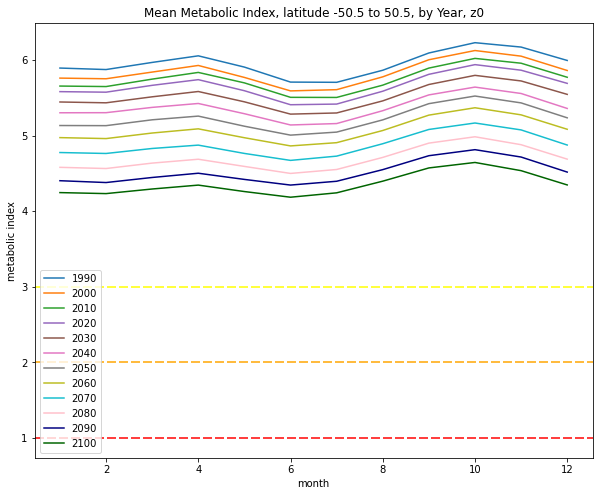

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, -50.5, 50.5], True, True, True, 'z0')

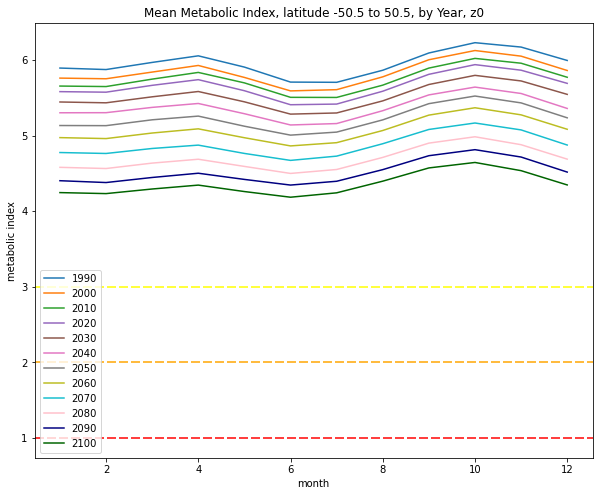

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, -50.5, 50.5], True, True, True, 'z0')

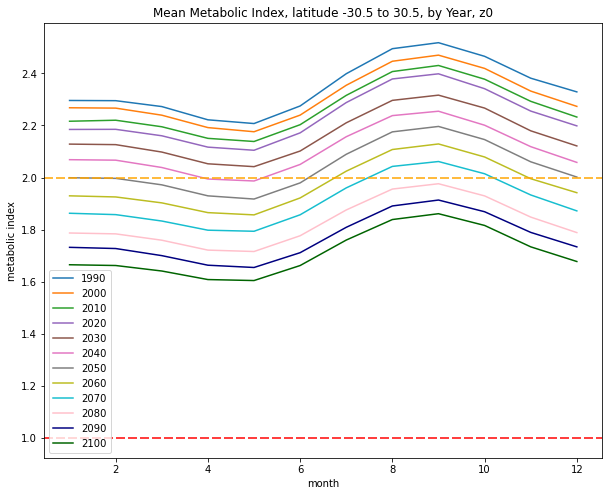

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, -30.5, 30.5], True, True, False, 'z0')

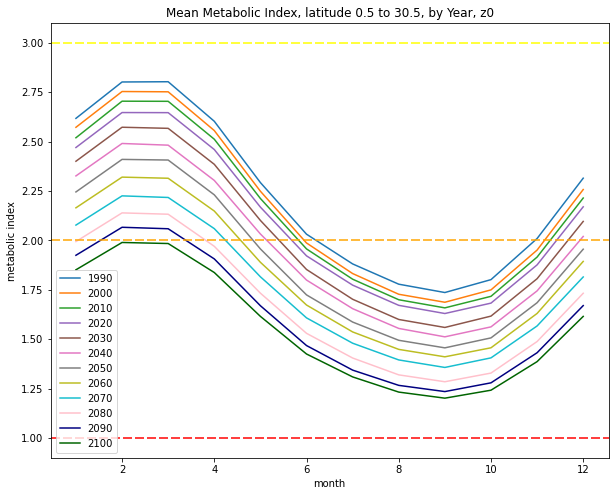

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, 0.5, 30.5], True, True, True, 'z0')

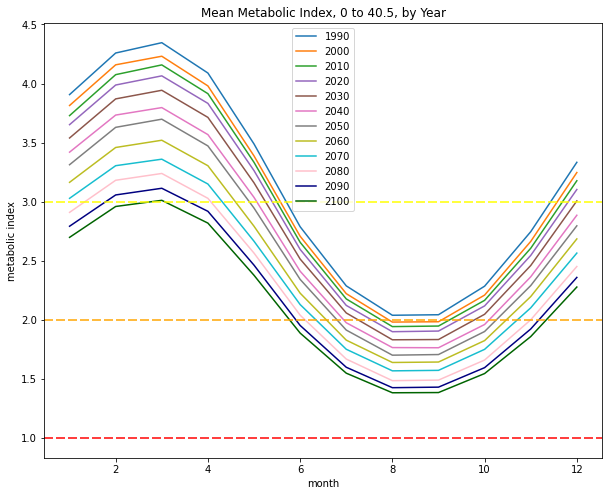

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, 0.5, 40.5], True, True, False, 'z0')

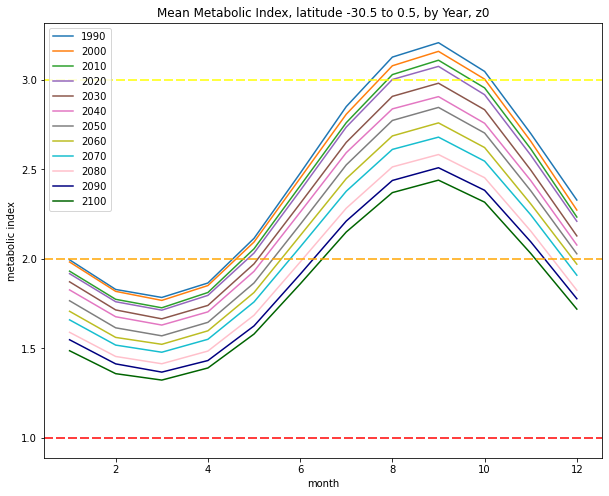

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
mf.year_comp(area, ds_z0avg, ax, [None, None, -30.5, 0], True, True, True, 'z0')

(0.9, 3.4)

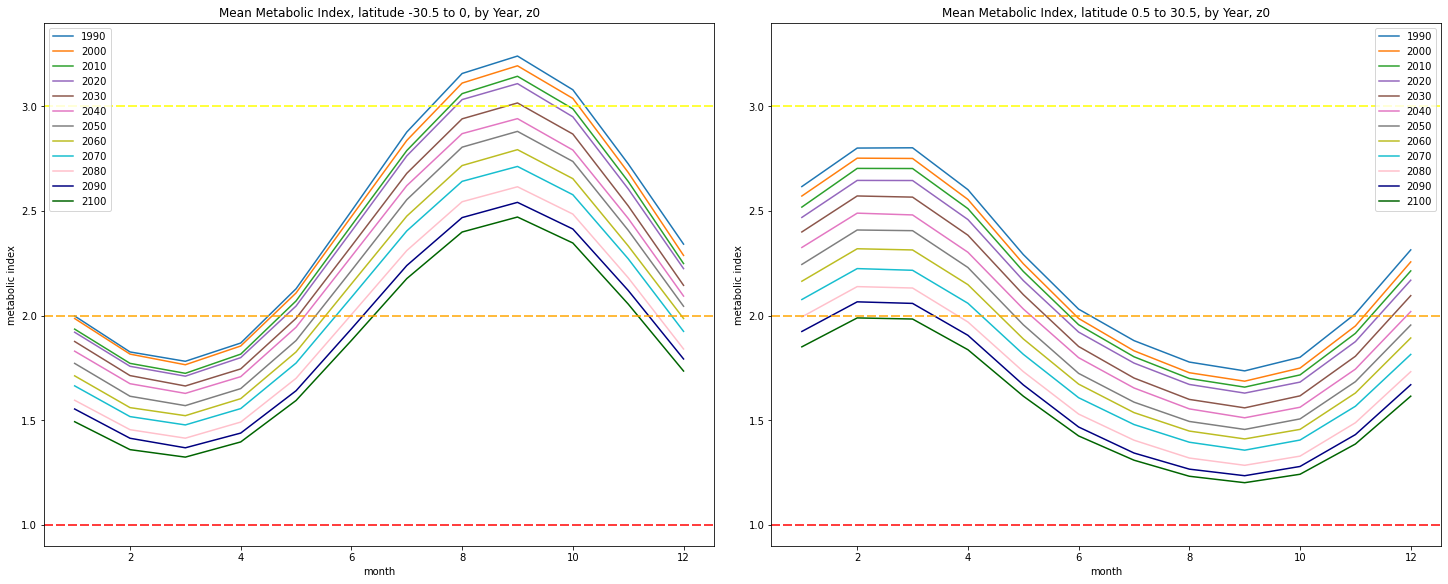

In [42]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
mf.year_comp(area, ds_z0avg, ax0, [None, None, -30.5, 0], True, True, True, 'z0')
ax0.set_ylim(0.9,3.4)
mf.year_comp(area, ds_z0avg, ax1, [None, None, 0, 30.5], True, True, True, 'z0')
ax1.set_ylim(0.9,3.4)

(1.2, 5.0)

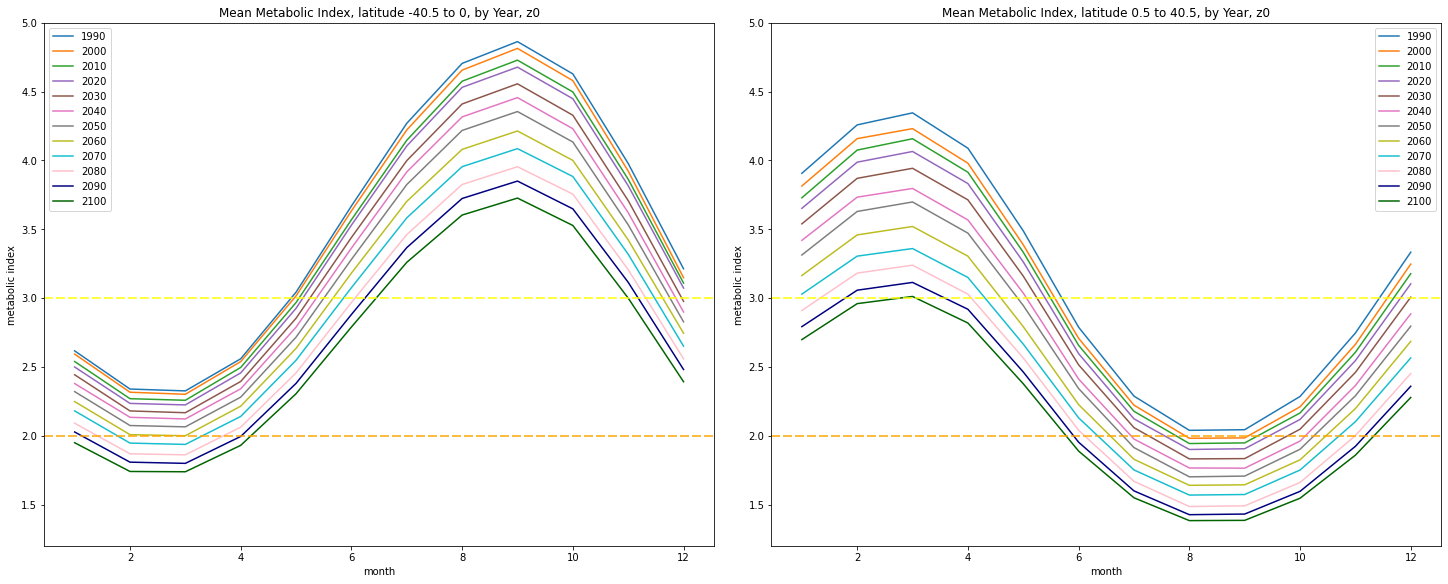

In [44]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
mf.year_comp(area, ds_z0avg, ax0, [None, None, -40.5, 0], True, True, True, 'z0')
ax0.set_ylim(1.2,5.0)
mf.year_comp(area, ds_z0avg, ax1, [None, None, 0, 40.5], True, True, True, 'z0')
ax1.set_ylim(1.2,5.0)

(0.9, 2.4)

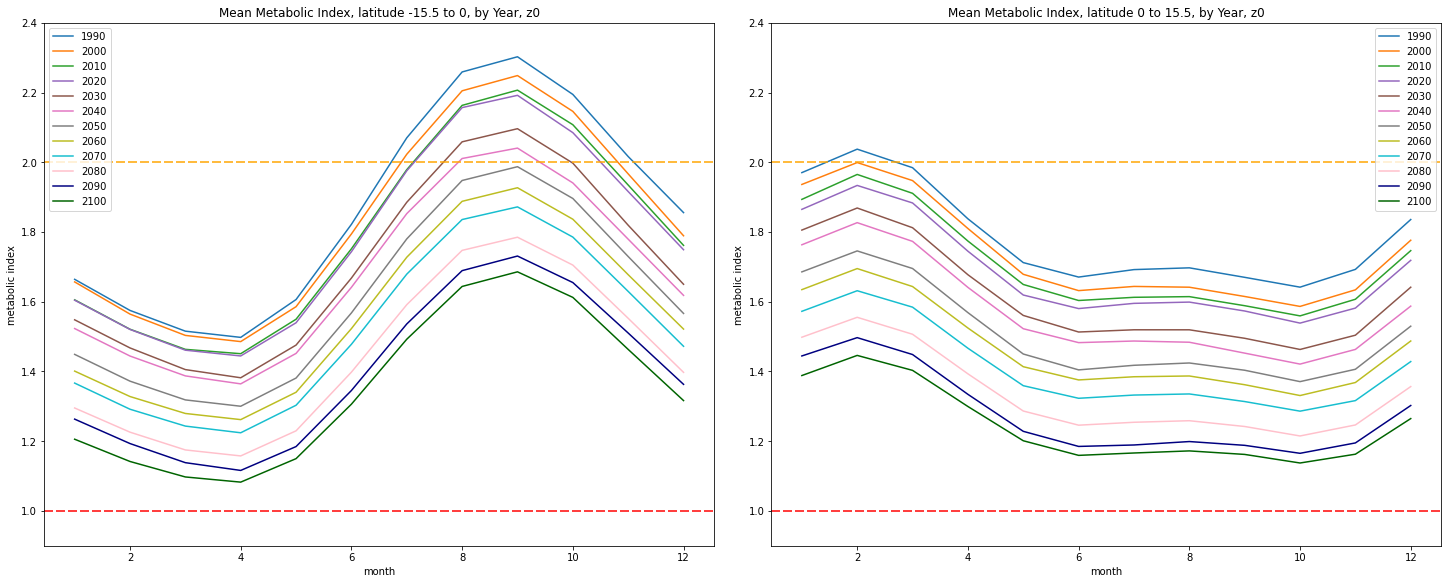

In [46]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
mf.year_comp(area, ds_z0avg, ax0, [None, None, -15.5, 0], True, True, True, 'z0')
ax0.set_ylim(0.9,2.4)
mf.year_comp(area, ds_z0avg, ax1, [None, None, 0, 15.5], True, True, True, 'z0')
ax1.set_ylim(0.9,2.4)

(1.5, 9.0)

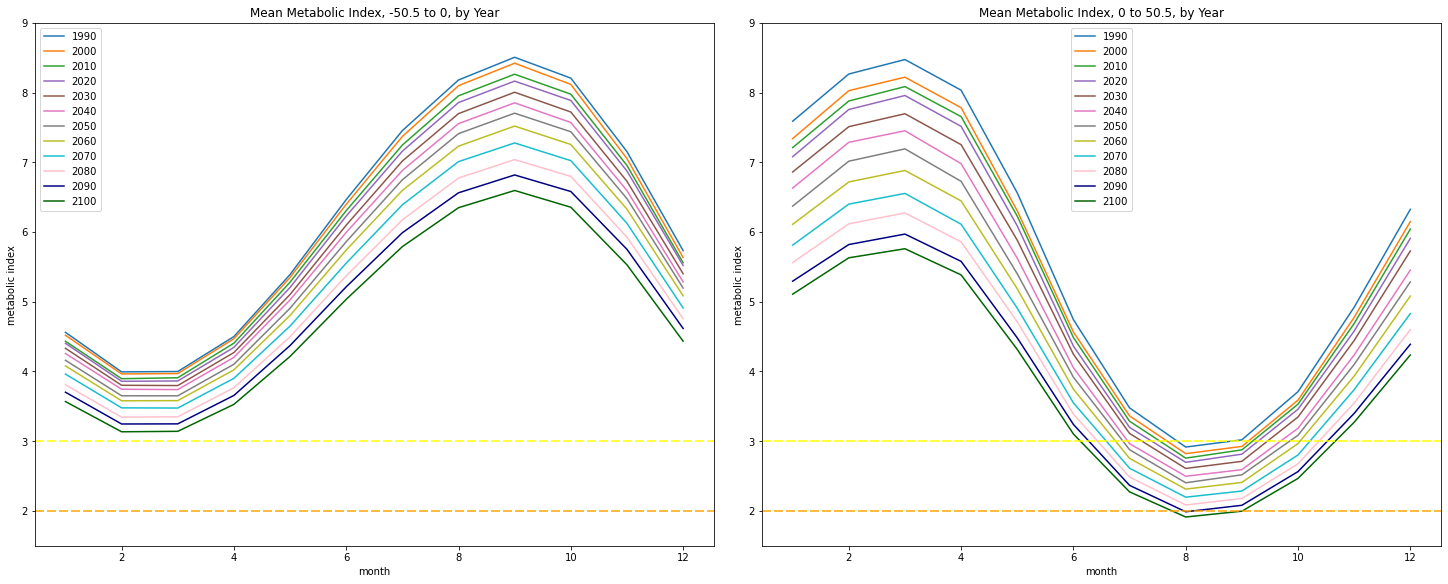

In [59]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -50.5, 0, False, True, True)
ax0.set_ylim(1.5,9)
year_comp(ax1, 0, 50.5, False, True, True)
ax1.set_ylim(1.5,9)

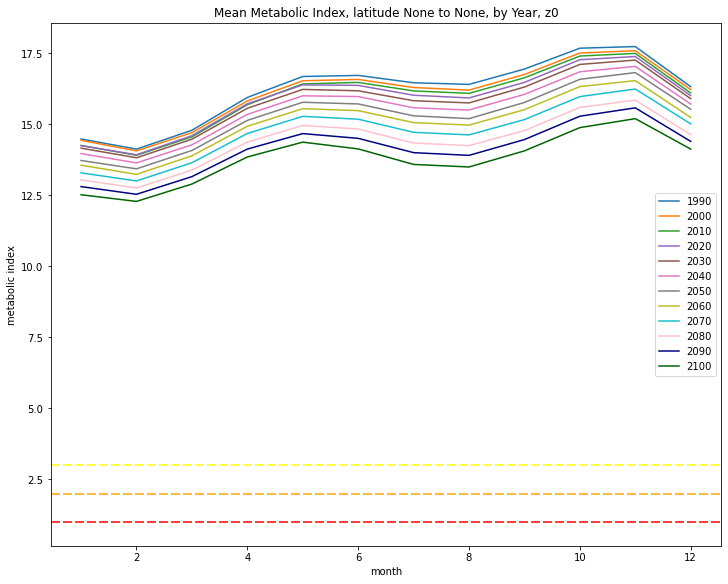

In [47]:
fig, ax = plt.subplots(figsize=(10,8),constrained_layout=True)
mf.year_comp(area, ds_z0avg, ax, [None, None, None, None], True, True, True, 'z0')

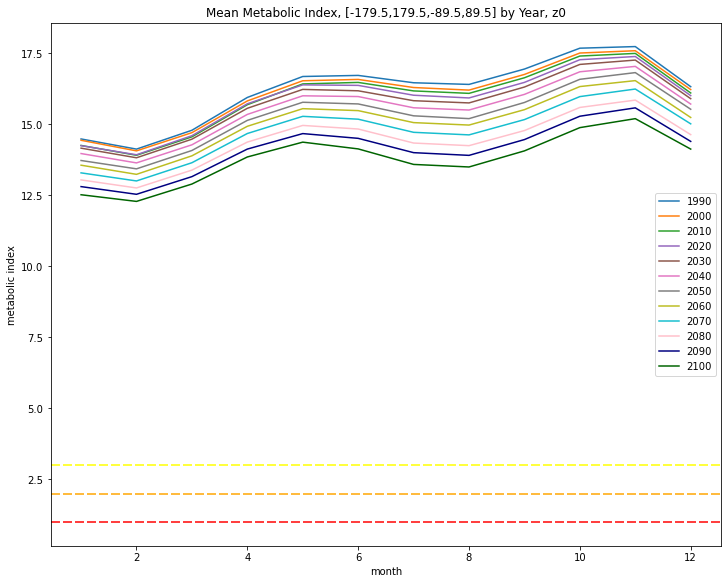

In [48]:
fig, ax = plt.subplots(figsize=(10,8),constrained_layout=True)
mf.year_comp(area, ds_z0avg, ax, [-179.5, 179.5, -89.5, 89.5], True, True, True, 'z0')

(7.5, 22.0)

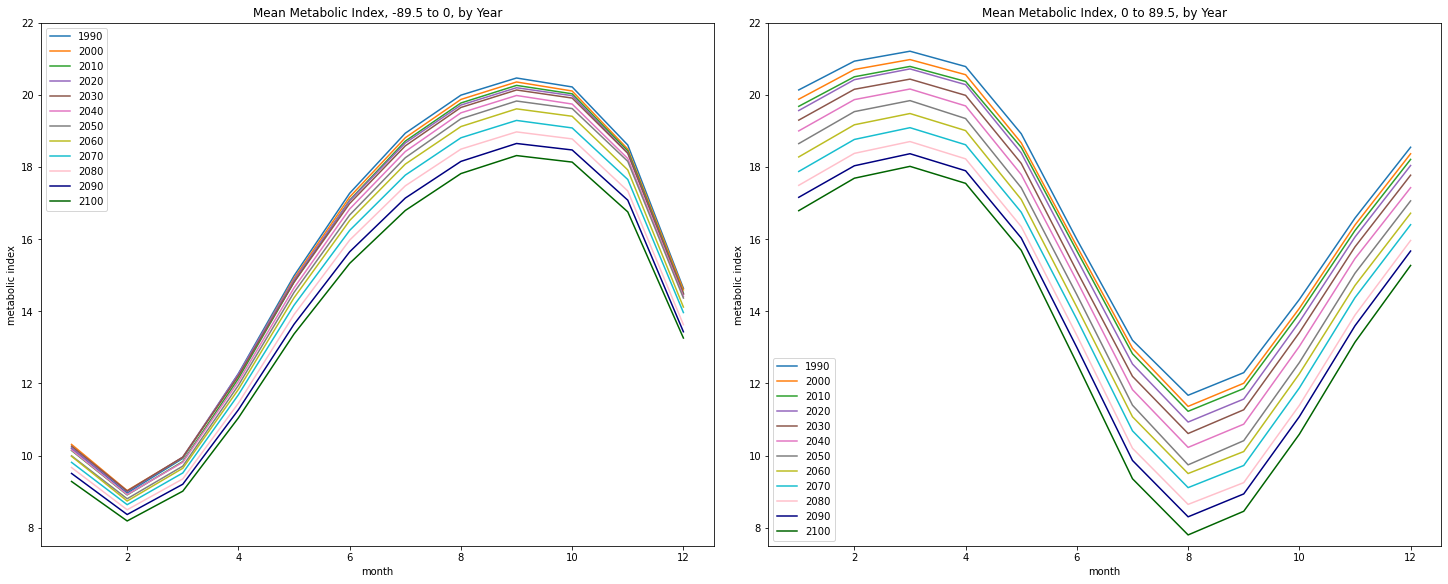

In [62]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -89.5, 0, False, False, False)
ax0.set_ylim(7.5,22)
year_comp(ax1, 0, 89.5, False, False, False)
ax1.set_ylim(7.5,22)